In [151]:
%pwd

'/Users/costefan/UCU/3 sem/CV/cv_1/ucu-cv-code/hw'

In [152]:
from matplotlib import pyplot as plt

In [153]:
def show_img(img, cmap):
    plt.imshow(img, cmap)

In [154]:
# %load taks1.py
import cv2
import numpy as np
from scipy.signal import convolve2d


def read_img(img_path='./res/marker_cut_gray_42.png'):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray


def edge_detection(img):
    """
    Edge detection using Sobel
    operator
    :param img: 
    :return: 
    """
    a1 = np.matrix([1, 2, 1])
    a2 = np.matrix([-1, 0, 1])
    Kx, Ky = a1.T * a2, a2.T * a1
    Gx = convolve2d(img, Kx, "same", "symm")
    Gy = convolve2d(img, Ky, "same", "symm")
    G = np.sqrt(Gx ** 2 + Gy ** 2)
    return G

In [155]:
img = read_img('../res/marker_cut_rgb_512.png')

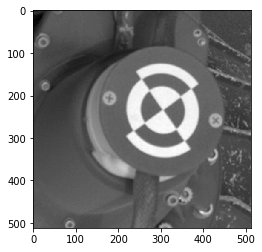

In [156]:
show_img(img, 'gray')

In [157]:
edges = edge_detection(img)
edges = edges.astype('uint8')

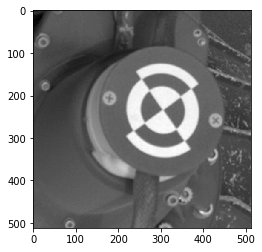

In [158]:
show_img(img, cmap='gray')

In [159]:
DEG_STEP = 1
R_STEP = np.pi / 180

thetas = np.deg2rad(np.arange(-90, 90, DEG_STEP))
r_length = int(np.linalg.norm(img.shape))
rhos = np.arange(-r_length, r_length, R_STEP)

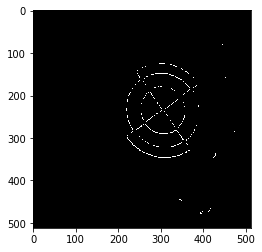

In [160]:
show_img(edges > 200, cmap='gray')

In [161]:
thresholded_img = edges > 200

In [162]:
thetas, rhos = brootforce_params(thresholded_img.shape)
thetas_count = len(thetas)

In [163]:
x_nonzero, y_nonzero = np.nonzero(thresholded_img)

In [164]:
hough_acc = np.zeros((2 * len(rhos), thetas_count))
hough_acc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [165]:
for x_ix, y_ix in zip(x_nonzero, y_nonzero):
    for ix_theta, theta in enumerate(thetas):
        rho = int(x_ix * np.sin(theta) + y_ix * np.cos(theta)) + r_length
        hough_acc[rho, ix_theta] += 1

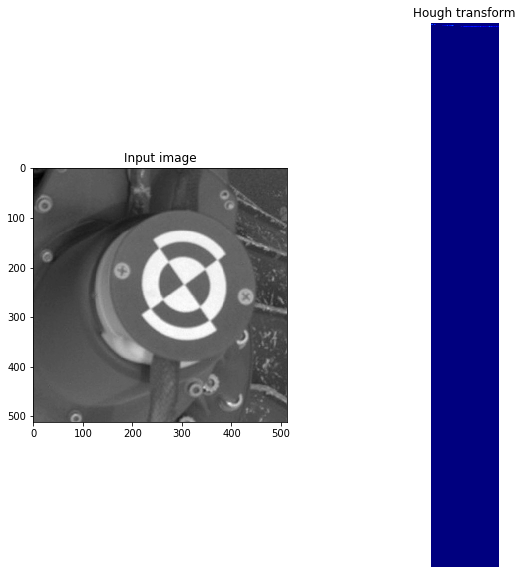

In [166]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Input image')
ax[0].axis('image')

ax[1].imshow(
    hough_acc, cmap='jet',
    extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
ax[1].set_aspect('equal', adjustable='box')
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

plt.axis('off')
plt.show()

In [167]:
idx = np.argmax(hough_acc)
rho = rhos[idx // hough_acc.shape[1]]
theta = thetas[idx % hough_acc.shape[1]]
print("rho={}, theta={}".format(rho, np.rad2deg(theta)))

def theta2gradient(theta):
    return np.cos(theta) / np.sin(theta)


def rho2intercept(theta, rho):
    return rho / np.sin(theta)

rho=-709.3741408683093, theta=-35.0


In [168]:
theta2gradient(theta), rho2intercept(rho, theta)

(-1.4281480067421146, -1.0428861079795069)

In [169]:
x = np.arange(0, img.shape[0])
y = theta2gradient(theta) * x + rho2intercept(rho, theta)
img.shape

(512, 512)

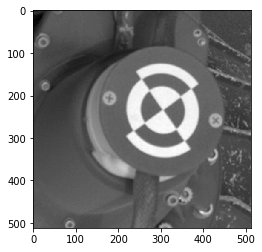

In [170]:
show_img(img, 'gray')

## merging everything in one func

In [171]:
THRESHOLD = 200

def hough_lines():
    """Hough lines detector
    :return: 
    """
    img = read_img('../res/marker_cut_rgb_512.png')
    img = edge_detection(img)
    
    thresolded_image = img > THRESHOLD
    
    hough_img = transform_hough(img)
    lines = detect_lines(hough_img)